<h2>TB project<h2>

<h4>Goal<h4>

The purpose of this EDA is to look at TB idicators by WHO region and by World Bank income group and see what countries reported bigger decrease in the prevalence by region and by World Bank income group. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tb_data=pd.read_csv('../final_proposal_data/tuberculosis_data_WHO.csv')

In [3]:
tb_data.head()

,Indicator,PUBLISH STATES,Year,WHO region,World Bank income group,Country,Numeric,Low,High
0,Prevalence of tuberculosis (per 100 000 popula...,Published,2007,Western Pacific,Lower-middle-income,Philippines,576.0,515.0,640.0
1,Deaths due to tuberculosis among HIV-negative ...,Published,2014,Americas,Upper-middle-income,Saint Vincent and the Grenadines,1.0,1.0,1.1
2,Deaths due to tuberculosis among HIV-negative ...,Published,2012,Americas,High-income,Venezuela (Bolivarian Republic of),1.8,1.8,1.8
3,Number of prevalent tuberculosis cases,Published,2014,Europe,High-income,Switzerland,630.0,270.0,1100.0
4,Number of prevalent tuberculosis cases,Published,2011,Africa,Low-income,Mozambique,130000.0,68000.0,210000.0


In [4]:
tb_data.shape

(6192, 9)

In [5]:
tb_data.dtypes

Indicator                   object
PUBLISH STATES              object
Year                         int64
WHO region                  object
World Bank income group     object
Country                     object
Numeric                    float64
Low                        float64
High                       float64
dtype: object

In [6]:
#Droping columns that will not be used in this analysis
tb_data.drop(columns=['PUBLISH STATES', 'Low', 'High'], inplace=True )

In [7]:
#Unique values of the indicator column shows that there are four indicators in this dataset: 
#two indicators of prevalence and death per 100,000 population and two absolute numbers of TB cases and death. 
tb_data.Indicator.unique()

array(['Prevalence of tuberculosis (per 100 000 population)',
       'Deaths due to tuberculosis among HIV-negative people (per 100 000 population)',
       'Number of prevalent tuberculosis cases',
       'Number of deaths due to tuberculosis, excluding HIV'],
      dtype=object)

<h4>Trend analysis of all indicators<h4>

In [8]:
# Pivot table for each indicator
tb_data_indic=tb_data.pivot_table(index='Indicator', columns='Year', values='Numeric')

In [9]:
tb_data_indic['indic_change']=(tb_data_indic[2014]-tb_data_indic[2007])/tb_data_indic[2007]

In [10]:
tb_data_indic

Year,2007,2008,2009,2010,2011,2012,2013,2014,indic_change
Indicator,,,,,,,,,
Deaths due to tuberculosis among HIV-negative people (per 100 000 population),18.008031,16.786373,15.864611,15.406373,14.824278,14.500361,14.341443,14.073918,-0.218464
"Number of deaths due to tuberculosis, excluding HIV",7245.106114,7026.844249,6737.684404,6557.610052,6321.461031,6126.545773,5891.247216,5768.637835,-0.203788
Number of prevalent tuberculosis cases,76884.835751,74578.518342,72379.537202,71120.827513,68949.925567,67291.417938,66248.673505,64235.358763,-0.164525
Prevalence of tuberculosis (per 100 000 population),189.811917,180.753368,173.181865,169.012435,164.929897,161.394021,158.670515,155.524330,-0.180640


<h4>TB data by WHO region<h4>

In [11]:
#Creating a separate dataframe for TB prevalebce first. 
tb_prev=tb_data[tb_data['Indicator']=='Prevalence of tuberculosis (per 100 000 population)'].copy()

In [12]:
tb_prev.columns

Index(['Indicator', 'Year', 'WHO region', 'World Bank income group', 'Country',
       'Numeric'],
      dtype='object')

In [13]:
# A pivot table by WHO regions and by year to see the trend in TB prevalence
tb_prev_who=tb_prev.pivot_table(index='WHO region', columns='Year', values='Numeric')

In [14]:
tb_prev_who['tb_prev_change']=(tb_prev_who[2014]-tb_prev_who[2007])/tb_prev_who[2007]
tb_prev_who.sort_values('tb_prev_change', ascending=False)

Year,2007,2008,2009,2010,2011,2012,2013,2014,tb_prev_change
WHO region,,,,,,,,,
Eastern Mediterranean,138.819048,138.480952,137.771429,136.961905,136.971429,137.409524,138.985714,139.047619,0.001647
South-East Asia,402.636364,387.818182,371.909091,359.636364,355.000000,351.545455,349.909091,351.909091,-0.125988
Africa,363.434783,348.369565,334.652174,325.130435,317.978723,311.914894,303.829787,299.893617,-0.174835
Americas,59.722857,57.394286,55.542857,53.882857,53.134286,51.944000,50.570857,49.180571,-0.176520
Western Pacific,249.607407,232.603704,220.540741,223.888889,211.700000,205.707407,204.748148,195.129630,-0.218254
Europe,70.600000,64.098113,59.383019,54.722642,50.837736,47.654717,45.966038,43.318868,-0.386418


The European region demostrated the highest decreases of TB prevalence of 38% from 2007 to 2014. The Western Pacific region showed the second highest decrease in TB prevalence. 

In [15]:
#Tb deaths rate by WHO region
tb_drate=tb_data[tb_data.Indicator=='Deaths due to tuberculosis among HIV-negative people (per 100 000 population)']

In [16]:
#Creating a pivot table to see the trend of TB death rate.
tb_drate_who=tb_drate.pivot_table(index='WHO region', columns='Year', values='Numeric')

In [17]:
#Creasting a column that will show the decrease of TB rate from 2007 to 2014. 
tb_drate_who['drate_change']=(tb_drate_who[2014]-tb_drate_who[2007])/tb_drate_who[2007]

In [18]:
tb_drate_who

Year,2007,2008,2009,2010,2011,2012,2013,2014,drate_change
WHO region,,,,,,,,,
Africa,38.923913,36.923913,35.267391,33.969130,33.265957,32.589362,32.068085,31.804255,-0.182912
Americas,3.733429,3.667714,3.396857,3.819143,3.416286,3.230571,3.176286,3.085143,-0.173644
Eastern Mediterranean,14.625238,14.217143,14.055238,13.875714,13.870476,14.136190,14.568571,14.935714,0.021229
Europe,4.322642,3.951698,3.525660,3.213396,2.976792,2.863396,2.654906,2.460377,-0.430816
South-East Asia,39.881818,36.227273,32.309091,29.481818,28.636364,28.027273,28.409091,29.263636,-0.266241
Western Pacific,21.461111,18.755556,17.898519,18.191852,15.881111,15.236296,14.989630,13.392963,-0.375943


In [19]:
#TB deaths numbers analysis by WHO region
tb_dnum=tb_data[tb_data.Indicator=='Number of deaths due to tuberculosis, excluding HIV']

In [20]:
#Pivot table
tb_dnum_who=tb_dnum.pivot_table(index="WHO region", columns='Year', values='Numeric')

In [21]:
#A column for the change in the nmber of deaths from 2007 to 2014. 
tb_dnum_who['dnum_change']=(tb_dnum_who[2014]-tb_dnum_who[2007])/tb_dnum_who[2007]

In [22]:
tb_dnum_who

Year,2007,2008,2009,2010,2011,2012,2013,2014,dnum_change
WHO region,,,,,,,,,
Africa,8999.893478,9068.871739,8938.676087,9128.586957,8976.319149,9163.638298,9373.936170,9460.042553,0.051128
Americas,579.248571,561.345714,541.645714,558.180000,533.042857,502.588857,499.218286,486.868000,-0.159483
Eastern Mediterranean,5713.214286,5250.709524,4827.128571,4547.280952,4217.352381,4141.861905,4143.842857,4171.147619,-0.269912
Europe,1065.027358,1046.787358,934.598113,859.135472,794.500943,744.331698,674.526604,633.122830,-0.405534
South-East Asia,58459.600000,55954.390909,53597.109091,51257.090909,49199.718182,46245.227273,42414.090909,40798.218182,-0.302113
Western Pacific,5353.967778,5115.659630,4806.103333,4493.050370,4220.373704,3894.151481,3538.100370,3241.605556,-0.394541


In [23]:
#The numbers pf prevalenct TB analysis by WHO region
tb_prev_num=tb_data[tb_data.Indicator=='Number of prevalent tuberculosis cases']

In [24]:
#Pivot table 
tb_prev_num_who=tb_prev_num.pivot_table(index='WHO region', columns='Year', values='Numeric')

In [25]:
#Column for calcuating the change in the indicator
tb_prev_num_who['tb_num_change']=(tb_prev_num_who[2014]-tb_prev_num_who[2007])/tb_prev_num_who[2007]

In [26]:
tb_prev_num_who

Year,2007,2008,2009,2010,2011,2012,2013,2014,tb_num_change
WHO region,,,,,,,,,
Africa,66481.695652,66160.391304,65189.543478,66036.282609,65194.276596,65931.765957,66585.255319,67705.127660,0.018403
Americas,10988.705714,10532.428571,10744.380000,10632.611429,10764.171429,10398.348571,10264.328571,10165.657714,-0.074899
Eastern Mediterranean,46081.428571,46267.142857,46051.904762,46401.904762,45872.380952,46764.285714,47639.047619,48417.142857,0.050687
Europe,12931.270566,11861.385849,11038.555094,10242.246415,9449.693585,8945.065660,8713.420943,8295.874528,-0.358464
South-East Asia,629900.909091,609844.545455,590770.909091,569815.454545,551751.818182,533607.272727,514662.727273,488290.909091,-0.224813
Western Pacific,104223.454074,99003.244074,94217.220741,93750.379630,88962.400000,83925.237037,82961.587037,77632.564074,-0.255133


In [27]:
#Combine all TB indicator changes in one table
indic_change=tb_prev_who.merge(tb_prev_num_who, on='WHO region', how='left')[['tb_prev_change', 'tb_num_change']]

In [28]:
indic_change=indic_change.merge(
    tb_drate_who, on='WHO region', how='left')[['tb_prev_change', 'tb_num_change', 'drate_change']]

In [29]:
indic_change=indic_change.merge(
    tb_dnum_who, on='WHO region', how='left')[['tb_prev_change', 'tb_num_change', 'drate_change', 'dnum_change']]

In [30]:
indic_change

Year,tb_prev_change,tb_num_change,drate_change,dnum_change
WHO region,,,,
Africa,-0.174835,0.018403,-0.182912,0.051128
Americas,-0.176520,-0.074899,-0.173644,-0.159483
Eastern Mediterranean,0.001647,0.050687,0.021229,-0.269912
Europe,-0.386418,-0.358464,-0.430816,-0.405534
South-East Asia,-0.125988,-0.224813,-0.266241,-0.302113
Western Pacific,-0.218254,-0.255133,-0.375943,-0.394541


The European region reported the highes decrease in all four indicators. Western Pacific region reported the second biggest decrease in all indicators. 

<h4>TB data by World Bank income group<h4>

In [31]:
#Creating an order of World Bank income group from high to low. 
tb_data['World Bank income group'] = pd.Categorical(tb_data['World Bank income group'], categories=['High-income', 'Upper-middle-income', 'Lower-middle-income', 'Low-income'], ordered=True)

In [32]:
#Pivot table for TB prevalence by WB income group
tb_prev_wb=tb_prev.pivot_table(index='World Bank income group', columns='Year', values='Numeric')

In [33]:
tb_prev_wb['tb_prev_change']=(tb_prev_wb[2014]-tb_prev_wb[2007])/tb_prev_wb[2007]
tb_prev_wb

Year,2007,2008,2009,2010,2011,2012,2013,2014,tb_prev_change
World Bank income group,,,,,,,,,
High-income,26.686885,25.668852,26.013115,25.331148,24.393443,23.677705,23.932459,23.649508,-0.113815
Low-income,341.854839,326.525806,313.922581,305.938710,306.500000,297.631250,291.925000,288.906250,-0.154886
Lower-middle-income,326.816327,313.632653,294.510204,286.448980,284.469388,277.224490,274.734694,270.387755,-0.172661
Upper-middle-income,161.428846,150.563462,147.590385,145.271154,130.026923,129.959615,125.357692,119.905769,-0.257222


In [34]:
#Pivot table for TB death numbers by WB income group
tb_dnum_wb=tb_dnum.pivot_table(index='World Bank income group', columns='Year', values='Numeric')

In [35]:
tb_dnum_wb['dnum_change']=(tb_dnum_wb[2014]-tb_dnum_wb[2007])/tb_dnum_wb[2007]

In [36]:
tb_dnum_wb

Year,2007,2008,2009,2010,2011,2012,2013,2014,dnum_change
World Bank income group,,,,,,,,,
High-income,649.671148,645.248197,606.358852,563.921967,530.000820,495.900492,448.587705,427.236230,-0.342381
Low-income,7701.354839,7496.193548,7310.354839,7240.064516,7033.610625,7024.843750,7044.875000,7111.812500,-0.076550
Lower-middle-income,19685.393878,19111.506122,18289.751020,17784.332653,17136.969388,16563.255102,15792.181633,15355.030612,-0.219978
Upper-middle-income,2987.485385,2845.673077,2703.200000,2602.792308,2485.506731,2344.335577,2236.254038,2174.612115,-0.272093


In [37]:
#Pivot table for TB death rate by WB income group
tb_drate_wb=tb_drate.pivot_table(index='World Bank income group', columns='Year', values='Numeric')

In [38]:
tb_drate_wb['drate_change']=(tb_drate_wb[2014]-tb_drate_wb[2007])/tb_drate_wb[2007]

In [39]:
tb_drate_wb

Year,2007,2008,2009,2010,2011,2012,2013,2014,drate_change
World Bank income group,,,,,,,,,
High-income,1.799836,1.686393,1.671475,1.479016,1.328852,1.310820,1.386885,1.352951,-0.248292
Low-income,38.800000,36.700000,34.916129,33.554839,33.446875,31.762500,31.359375,30.581250,-0.211823
Lower-middle-income,31.382245,29.416531,26.893265,25.814694,25.500816,24.961837,25.033878,25.148163,-0.198650
Upper-middle-income,12.023654,10.726731,10.764231,11.117115,9.134808,9.491923,8.990000,8.402885,-0.301137


In [40]:
#Pivot table for the number of TB prevalent cases by WB income group
tb_prev_num_wb=tb_prev_num.pivot_table(index='World Bank income group', columns='Year', values='Numeric')

In [41]:
tb_prev_num_wb['prev_num_change']=(tb_prev_num_wb[2014]-tb_prev_num_wb[2007])/tb_prev_num_wb[2007]

In [42]:
tb_prev_num_wb

Year,2007,2008,2009,2010,2011,2012,2013,2014,prev_num_change
World Bank income group,,,,,,,,,
High-income,8312.897377,7731.335246,7403.459344,6994.928852,6584.917377,6282.907869,6132.159180,5882.376230,-0.292380
Low-income,64271.295484,63080.970645,61790.647097,63097.098387,62241.662500,62920.003125,62845.317187,63917.507187,-0.005505
Lower-middle-income,190923.448980,185858.183673,180484.938776,175634.551020,171226.632653,167160.122449,162934.775510,156734.489796,-0.179072
Upper-middle-income,57385.142308,54990.028846,53045.530769,52644.730769,49860.911538,47442.146154,47756.284615,45720.854231,-0.203263


In [43]:
#Mergina all indicator change columns into one table
indic_change_wb=tb_prev_wb.merge(
    tb_prev_num_wb, on='World Bank income group', how='left')[['tb_prev_change', 'prev_num_change']]

In [44]:
indic_change_wb=indic_change_wb.merge(
    tb_drate_wb, on='World Bank income group', how='left')[['tb_prev_change', 'prev_num_change', 'drate_change']]

In [45]:
indic_change_wb=indic_change_wb.merge(
    tb_dnum_wb, on='World Bank income group', how='left')[['tb_prev_change', 'prev_num_change', 'drate_change', 'dnum_change']]

In [46]:
indic_change_wb

Year,tb_prev_change,prev_num_change,drate_change,dnum_change
World Bank income group,,,,
High-income,-0.113815,-0.292380,-0.248292,-0.342381
Low-income,-0.154886,-0.005505,-0.211823,-0.076550
Lower-middle-income,-0.172661,-0.179072,-0.198650,-0.219978
Upper-middle-income,-0.257222,-0.203263,-0.301137,-0.272093


The highest decrease in all indicators is reported by middle-income countries, followed by the lower-middle income coutrnies, followed by high income countries. The group of low income countries reported decreases in TB prevalence and TB death rates, not in absolute numbers of prevalent TB and numbers TB death. It would be good to look at the data together with population trends. 

<h4>TB data for USA<h4>

In [47]:
#Creating a dataframe for US.
tb_usa=tb_data[tb_data['Country']=='United States of America'].copy()

In [48]:
#Pivot tables for the dataframes to see the trends: one for the US data
tb_usa_pivot=tb_usa.pivot_table(index='Indicator', columns='Year', values='Numeric')

In [49]:
tb_usa_pivot['indicator_change']=(tb_usa_pivot[2014]-tb_usa_pivot[2007])/tb_usa_pivot[2007]

In [50]:
tb_usa_pivot.sort_values('indicator_change', ascending=False)

Year,2007,2008,2009,2010,2011,2012,2013,2014,indicator_change
Indicator,,,,,,,,,
"Number of deaths due to tuberculosis, excluding HIV",560.00,600.0,550.00,590.00,560.00,530.00,500.00,460.00,-0.178571
Deaths due to tuberculosis among HIV-negative people (per 100 000 population),0.19,0.2,0.18,0.19,0.18,0.17,0.16,0.14,-0.263158
Number of prevalent tuberculosis cases,18000.00,17000.0,17000.00,16000.00,15000.00,14000.00,13000.00,12000.00,-0.333333
Prevalence of tuberculosis (per 100 000 population),5.90,5.6,5.40,5.10,4.80,4.50,4.10,3.80,-0.355932


In the US, all four indicators decreased, more in the rate and the number of prevalent TB than in the rate and the nuber of deaths, while in almost all regions, death rates and numbers decreased more than the rates and the nubers of the disease. 

<h3>Data visualization<h3>

<h4> Boxplots<h4>

In [51]:
#Creating a dataframe or prevalence and other data for 2014 only. 
tb_prev_2014=tb_prev[tb_prev['Year']==2014].copy()
tb_data_2014=tb_data[tb_data['Year']==2014].copy()

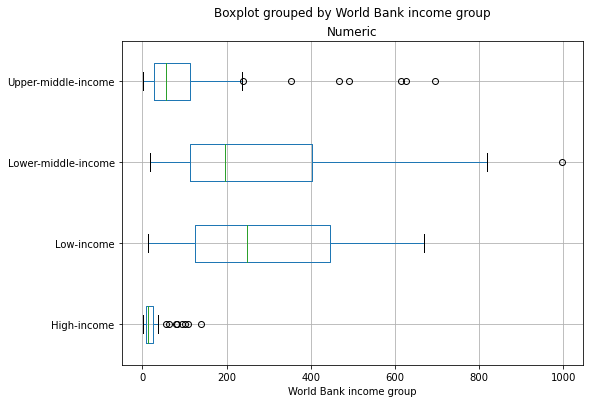

In [52]:
ax_prev=tb_prev_2014.boxplot(column='Numeric', by='World Bank income group', figsize=(8, 6), rot=0, vert=False)

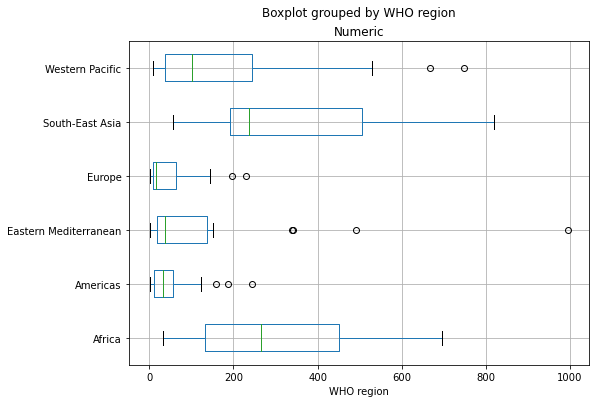

In [53]:
ax_who=tb_prev_2014.boxplot(column='Numeric', by='WHO region', figsize=(8, 6), rot=0, vert=False)

In [54]:
tb_prev.describe()

,Year,Numeric
count,1548.000000,1548.000000
mean,2010.505168,169.136460
std,2.292022,207.331239
min,2007.000000,0.420000
25%,2009.000000,20.000000
50%,2011.000000,84.000000
75%,2013.000000,242.000000
max,2014.000000,1074.000000


<h4>Violine plot<h4>

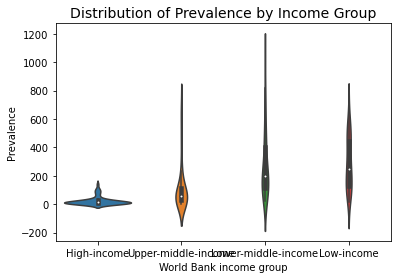

In [55]:
import seaborn as sns
ax=sns.violinplot(x='World Bank income group', y='Numeric', data=tb_prev_2014, figsize=(15,12))

plt.xlabel('World Bank income group')
plt.ylabel('Prevalence')
plt.title('Distribution of Prevalence by Income Group', fontsize=14)

plt.show()

<AxesSubplot:>

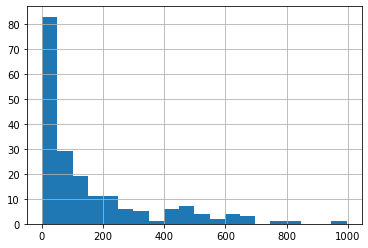

In [56]:
tb_prev_2014.Numeric.hist(bins=20)

<h4> Line plots<h4>

In [57]:
tb_by_year=tb_data.groupby(['Indicator', 'Year']).agg({'Numeric':'mean'}).reset_index()

In [58]:
tb_by_year = tb_by_year[tb_by_year.Indicator.isin(['Deaths due to tuberculosis among HIV-negative people (per 100 000 population)','Prevalence of tuberculosis (per 100 000 population)'])]

In [59]:
tb_by_year = tb_by_year.pivot_table(index='Year', columns='Indicator', values='Numeric').reset_index()

In [60]:
tb_by_year

Indicator,Year,Deaths due to tuberculosis among HIV-negative people (per 100 000 population),Prevalence of tuberculosis (per 100 000 population)
0,2007,18.008031,189.811917
1,2008,16.786373,180.753368
2,2009,15.864611,173.181865
3,2010,15.406373,169.012435
4,2011,14.824278,164.929897
5,2012,14.500361,161.394021
6,2013,14.341443,158.670515
7,2014,14.073918,155.524330


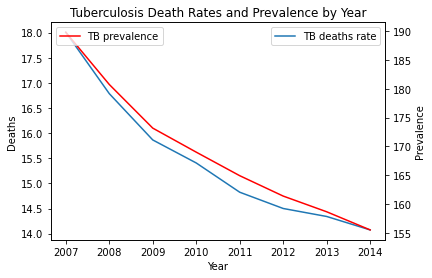

In [61]:
ax = tb_by_year.plot('Year','Deaths due to tuberculosis among HIV-negative people (per 100 000 population)', label='TB deaths rate')
ax1 = ax.twinx()
tb_by_year.plot('Year','Prevalence of tuberculosis (per 100 000 population)', ax=ax1, color='r', label='TB prevalence')

ax.set_xlabel('Year')
ax.set_ylabel('Deaths')
ax1.set_ylabel('Prevalence')
plt.title('Tuberculosis Death Rates and Prevalence by Year')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax1.get_legend_handles_labels()
ax1.legend(loc='upper left');

In [62]:
tb_who=tb_data.groupby(['Indicator', 'Year', 'WHO region']).agg({'Numeric':'mean'}).reset_index()

In [63]:
tb_who

,Indicator,Year,WHO region,Numeric
0,Deaths due to tuberculosis among HIV-negative ...,2007,Africa,38.923913
1,Deaths due to tuberculosis among HIV-negative ...,2007,Americas,3.733429
2,Deaths due to tuberculosis among HIV-negative ...,2007,Eastern Mediterranean,14.625238
3,Deaths due to tuberculosis among HIV-negative ...,2007,Europe,4.322642
4,Deaths due to tuberculosis among HIV-negative ...,2007,South-East Asia,39.881818
...,...,...,...,...
187,Prevalence of tuberculosis (per 100 000 popula...,2014,Americas,49.180571
188,Prevalence of tuberculosis (per 100 000 popula...,2014,Eastern Mediterranean,139.047619
189,Prevalence of tuberculosis (per 100 000 popula...,2014,Europe,43.318868
190,Prevalence of tuberculosis (per 100 000 popula...,2014,South-East Asia,351.909091


In [64]:
tb_who = tb_who[tb_who.Indicator.isin([
    'Deaths due to tuberculosis among HIV-negative people (per 100 000 population)',
    'Prevalence of tuberculosis (per 100 000 population)'])]

In [65]:
tb_who

,Indicator,Year,WHO region,Numeric
0,Deaths due to tuberculosis among HIV-negative ...,2007,Africa,38.923913
1,Deaths due to tuberculosis among HIV-negative ...,2007,Americas,3.733429
2,Deaths due to tuberculosis among HIV-negative ...,2007,Eastern Mediterranean,14.625238
3,Deaths due to tuberculosis among HIV-negative ...,2007,Europe,4.322642
4,Deaths due to tuberculosis among HIV-negative ...,2007,South-East Asia,39.881818
...,...,...,...,...
187,Prevalence of tuberculosis (per 100 000 popula...,2014,Americas,49.180571
188,Prevalence of tuberculosis (per 100 000 popula...,2014,Eastern Mediterranean,139.047619
189,Prevalence of tuberculosis (per 100 000 popula...,2014,Europe,43.318868
190,Prevalence of tuberculosis (per 100 000 popula...,2014,South-East Asia,351.909091


In [66]:
tb_who_piv = tb_who.pivot_table(index=['WHO region', 'Year'], columns='Indicator', values='Numeric').reset_index()

In [67]:
tb_who_piv.head(10)

Indicator,WHO region,Year,Deaths due to tuberculosis among HIV-negative people (per 100 000 population),Prevalence of tuberculosis (per 100 000 population)
0,Africa,2007,38.923913,363.434783
1,Africa,2008,36.923913,348.369565
2,Africa,2009,35.267391,334.652174
3,Africa,2010,33.969130,325.130435
4,Africa,2011,33.265957,317.978723
5,Africa,2012,32.589362,311.914894
6,Africa,2013,32.068085,303.829787
7,Africa,2014,31.804255,299.893617
8,Americas,2007,3.733429,59.722857
9,Americas,2008,3.667714,57.394286


In [68]:
tb_who_prev=tb_who_piv.pivot_table(index='Year', columns='WHO region', values='Prevalence of tuberculosis (per 100 000 population)')

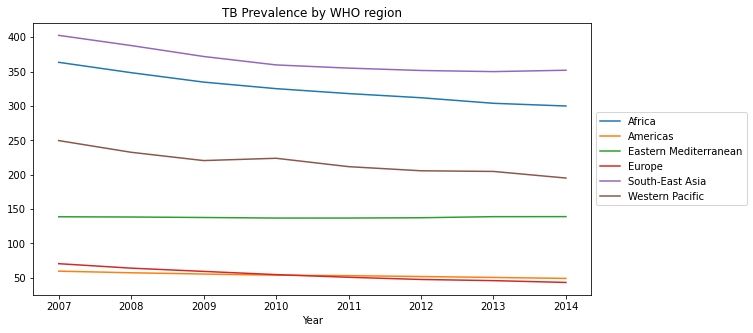

In [69]:
ax=tb_who_prev.plot(figsize=(10, 5), title='TB Prevalence by WHO region')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [70]:
tb_who_drate=tb_who_piv.pivot_table(index='Year', columns='WHO region', values='Deaths due to tuberculosis among HIV-negative people (per 100 000 population)')

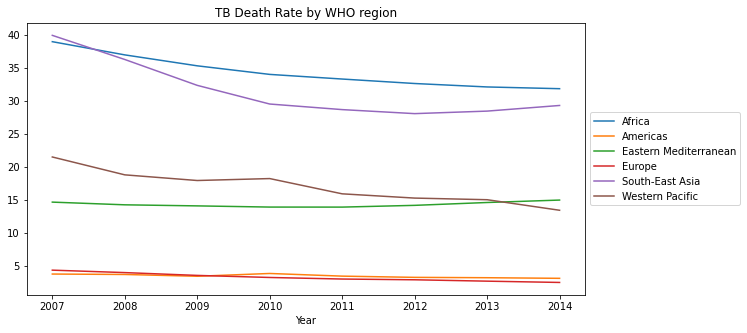

In [71]:
ax = tb_who_drate.plot(figsize=(10,5), title='TB Death Rate by WHO region')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [72]:
tb_data[tb_data['WHO region']=='Eastern Mediterranean'].Country.unique()

array(['Morocco', 'Kuwait', 'Oman', 'Syrian Arab Republic', 'Lebanon',
       'Sudan', 'Saudi Arabia', 'Iran (Islamic Republic of)', 'Tunisia',
       'Somalia', 'Djibouti', 'Pakistan', 'Afghanistan', 'Egypt',
       'United Arab Emirates', 'Jordan', 'Qatar', 'Iraq', 'Yemen',
       'Bahrain', 'Libya'], dtype=object)

<h4>Line plots by country and by WHO region: TB prevalence<h4>

In [73]:
tb_data.head()

,Indicator,Year,WHO region,World Bank income group,Country,Numeric
0,Prevalence of tuberculosis (per 100 000 popula...,2007,Western Pacific,Lower-middle-income,Philippines,576.0
1,Deaths due to tuberculosis among HIV-negative ...,2014,Americas,Upper-middle-income,Saint Vincent and the Grenadines,1.0
2,Deaths due to tuberculosis among HIV-negative ...,2012,Americas,High-income,Venezuela (Bolivarian Republic of),1.8
3,Number of prevalent tuberculosis cases,2014,Europe,High-income,Switzerland,630.0
4,Number of prevalent tuberculosis cases,2011,Africa,Low-income,Mozambique,130000.0


In [74]:
tb_prev.sort_values('Numeric').tail()

,Indicator,Year,WHO region,World Bank income group,Country,Numeric
4991,Prevalence of tuberculosis (per 100 000 popula...,2013,Eastern Mediterranean,Lower-middle-income,Djibouti,961.0
3500,Prevalence of tuberculosis (per 100 000 popula...,2007,Africa,Upper-middle-income,Namibia,990.0
4066,Prevalence of tuberculosis (per 100 000 popula...,2014,Eastern Mediterranean,Lower-middle-income,Djibouti,996.0
4007,Prevalence of tuberculosis (per 100 000 popula...,2008,Western Pacific,Low-income,Cambodia,1003.0
3449,Prevalence of tuberculosis (per 100 000 popula...,2007,Western Pacific,Low-income,Cambodia,1074.0


In [75]:
tb_prev_pivot=pd.pivot_table(tb_prev, index=['WHO region','Year'], columns=['Country'], values='Numeric')

In [76]:
tb_prev_pivot.head()

Country          Afghanistan  Albania  Algeria  Andorra  Angola  \
WHO region Year                                                   
Africa     2007          NaN      NaN    138.0      NaN   514.0   
           2008          NaN      NaN    137.0      NaN   516.0   
           2009          NaN      NaN    135.0      NaN   516.0   
           2010          NaN      NaN    133.0      NaN   513.0   
           2011          NaN      NaN    129.0      NaN   510.0   

Country          Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
WHO region Year                                                                
Africa     2007                  NaN        NaN      NaN        NaN      NaN   
           2008                  NaN        NaN      NaN        NaN      NaN   
           2009                  NaN        NaN      NaN        NaN      NaN   
           2010                  NaN        NaN      NaN        NaN      NaN   
           2011                  NaN        NaN      NaN        NaN      NaN   

Country          ...  United Republic of Tanzania  United States of America  \
WHO region Year  ...                                                          
Africa     2007  ...                        726.0                       NaN   
           2008  ...                        692.0                       NaN   
           2009  ...                        667.0                       NaN   
           2010  ...                        695.0                       NaN   
           2011  ...                        656.0                       NaN   

Country          Uruguay  Uzbekistan  Vanuatu  \
WHO region Year                                 
Africa     2007      NaN         NaN      NaN   
           2008      NaN         NaN      NaN   
           2009      NaN         NaN      NaN   
           2010      NaN         NaN      NaN   
           2011      NaN         NaN      NaN   

Country          Venezuela (Bolivarian Republic of)  Viet Nam  Yemen  Zambia  \
WHO region Year                                                                
Africa     2007                                 NaN       NaN    NaN   510.0   
           2008                                 NaN       NaN    NaN   493.0   
           2009                                 NaN       NaN    NaN   450.0   
           2010                                 NaN       NaN    NaN   424.0   
           2011                                 NaN       NaN    NaN   465.0   

Country          Zimbabwe  
WHO region Year            
Africa     2007     438.0  
           2008     408.0  
           2009     359.0  
           2010     335.0  
           2011     327.0  

[5 rows x 194 columns]

<AxesSubplot:title={'center':'TB Prevalence by WHO Region, 2007-2014'}, xlabel='WHO region,Year'>

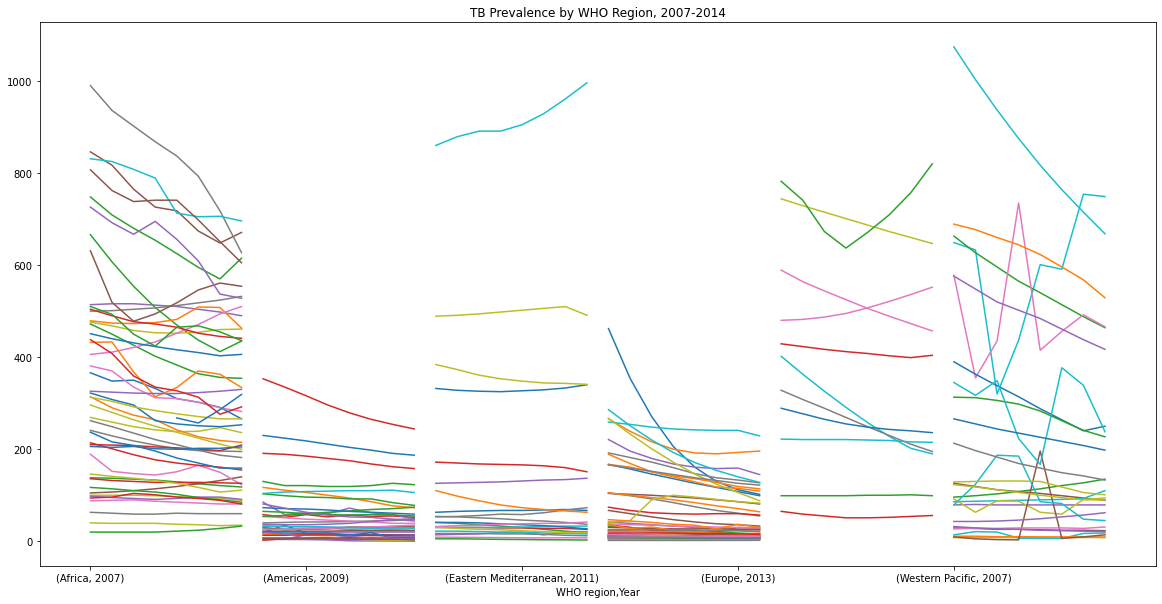

In [77]:
tb_prev_pivot.plot(figsize=(20,10), legend=False, title='TB Prevalence by WHO Region, 2007-2014')

In [78]:
tb_prev[(tb_prev['WHO region']=='Africa') & (tb_prev['Year']==2007)].sort_values('Numeric').tail(10)

,Indicator,Year,WHO region,World Bank income group,Country,Numeric
6100,Prevalence of tuberculosis (per 100 000 popula...,2007,Africa,Lower-middle-income,Zambia,510.0
938,Prevalence of tuberculosis (per 100 000 popula...,2007,Africa,Upper-middle-income,Angola,514.0
526,Prevalence of tuberculosis (per 100 000 popula...,2007,Africa,Low-income,Mozambique,631.0
5733,Prevalence of tuberculosis (per 100 000 popula...,2007,Africa,Low-income,Central African Republic,666.0
301,Prevalence of tuberculosis (per 100 000 popula...,2007,Africa,Low-income,United Republic of Tanzania,726.0
3507,Prevalence of tuberculosis (per 100 000 popula...,2007,Africa,Upper-middle-income,Gabon,748.0
744,Prevalence of tuberculosis (per 100 000 popula...,2007,Africa,Lower-middle-income,Swaziland,807.0
1062,Prevalence of tuberculosis (per 100 000 popula...,2007,Africa,Upper-middle-income,South Africa,831.0
4731,Prevalence of tuberculosis (per 100 000 popula...,2007,Africa,Lower-middle-income,Lesotho,846.0
3500,Prevalence of tuberculosis (per 100 000 popula...,2007,Africa,Upper-middle-income,Namibia,990.0


In [79]:
tb_prev[(tb_prev['WHO region']=='Americas') & (tb_prev['Year']==2007)].sort_values('Numeric').tail(10)

,Indicator,Year,WHO region,World Bank income group,Country,Numeric
5679,Prevalence of tuberculosis (per 100 000 popula...,2007,Americas,Upper-middle-income,Panama,73.0
4219,Prevalence of tuberculosis (per 100 000 popula...,2007,Americas,Upper-middle-income,Suriname,81.0
3221,Prevalence of tuberculosis (per 100 000 popula...,2007,Americas,Lower-middle-income,Honduras,85.0
3120,Prevalence of tuberculosis (per 100 000 popula...,2007,Americas,Upper-middle-income,Ecuador,103.0
3942,Prevalence of tuberculosis (per 100 000 popula...,2007,Americas,Lower-middle-income,Guatemala,104.0
4870,Prevalence of tuberculosis (per 100 000 popula...,2007,Americas,Upper-middle-income,Dominican Republic,117.0
4689,Prevalence of tuberculosis (per 100 000 popula...,2007,Americas,Lower-middle-income,Guyana,130.0
5496,Prevalence of tuberculosis (per 100 000 popula...,2007,Americas,Upper-middle-income,Peru,191.0
5379,Prevalence of tuberculosis (per 100 000 popula...,2007,Americas,Lower-middle-income,Bolivia (Plurinational State of),230.0
522,Prevalence of tuberculosis (per 100 000 popula...,2007,Americas,Low-income,Haiti,353.0


In [80]:
tb_prev[(tb_prev['WHO region']=='Eastern Mediterranean') & (tb_prev['Year']==2007)].sort_values('Numeric').tail()

,Indicator,Year,WHO region,World Bank income group,Country,Numeric
2859,Prevalence of tuberculosis (per 100 000 popula...,2007,Eastern Mediterranean,Lower-middle-income,Sudan,172.0
1151,Prevalence of tuberculosis (per 100 000 popula...,2007,Eastern Mediterranean,Low-income,Afghanistan,332.0
2872,Prevalence of tuberculosis (per 100 000 popula...,2007,Eastern Mediterranean,Lower-middle-income,Pakistan,384.0
6098,Prevalence of tuberculosis (per 100 000 popula...,2007,Eastern Mediterranean,Low-income,Somalia,489.0
4970,Prevalence of tuberculosis (per 100 000 popula...,2007,Eastern Mediterranean,Lower-middle-income,Djibouti,860.0


In [81]:
tb_prev[(tb_prev['WHO region']=='Europe') & (tb_prev['Year']==2007)].sort_values('Numeric').tail()

,Indicator,Year,WHO region,World Bank income group,Country,Numeric
294,Prevalence of tuberculosis (per 100 000 popula...,2007,Europe,Lower-middle-income,Republic of Moldova,259.0
1323,Prevalence of tuberculosis (per 100 000 popula...,2007,Europe,Lower-middle-income,Kyrgyzstan,266.0
1621,Prevalence of tuberculosis (per 100 000 popula...,2007,Europe,Upper-middle-income,Turkmenistan,267.0
4606,Prevalence of tuberculosis (per 100 000 popula...,2007,Europe,Lower-middle-income,Tajikistan,286.0
1122,Prevalence of tuberculosis (per 100 000 popula...,2007,Europe,Upper-middle-income,Azerbaijan,462.0


In [82]:
tb_prev[(tb_prev['WHO region']=='Western Pacific') & (tb_prev['Year']==2007)].sort_values('Numeric').tail(10)

,Indicator,Year,WHO region,World Bank income group,Country,Numeric
166,Prevalence of tuberculosis (per 100 000 popula...,2007,Western Pacific,Lower-middle-income,Viet Nam,266.0
719,Prevalence of tuberculosis (per 100 000 popula...,2007,Western Pacific,Upper-middle-income,Mongolia,313.0
1853,Prevalence of tuberculosis (per 100 000 popula...,2007,Western Pacific,Upper-middle-income,Tuvalu,345.0
3932,Prevalence of tuberculosis (per 100 000 popula...,2007,Western Pacific,Lower-middle-income,Micronesia (Federated States of),390.0
0,Prevalence of tuberculosis (per 100 000 popula...,2007,Western Pacific,Lower-middle-income,Philippines,576.0
5373,Prevalence of tuberculosis (per 100 000 popula...,2007,Western Pacific,Upper-middle-income,Marshall Islands,578.0
3193,Prevalence of tuberculosis (per 100 000 popula...,2007,Western Pacific,Lower-middle-income,Kiribati,649.0
3100,Prevalence of tuberculosis (per 100 000 popula...,2007,Western Pacific,Lower-middle-income,Lao People's Democratic Republic,663.0
363,Prevalence of tuberculosis (per 100 000 popula...,2007,Western Pacific,Lower-middle-income,Papua New Guinea,689.0
3449,Prevalence of tuberculosis (per 100 000 popula...,2007,Western Pacific,Low-income,Cambodia,1074.0


In [83]:
tb_prev[(tb_prev['WHO region']=='South-East Asia') & (tb_prev['Year']==2007)].sort_values('Numeric').tail(10)

,Indicator,Year,WHO region,World Bank income group,Country,Numeric
3987,Prevalence of tuberculosis (per 100 000 popula...,2007,South-East Asia,Lower-middle-income,Sri Lanka,99.0
2991,Prevalence of tuberculosis (per 100 000 popula...,2007,South-East Asia,Low-income,Nepal,222.0
5025,Prevalence of tuberculosis (per 100 000 popula...,2007,South-East Asia,Upper-middle-income,Thailand,289.0
4015,Prevalence of tuberculosis (per 100 000 popula...,2007,South-East Asia,Lower-middle-income,India,328.0
5234,Prevalence of tuberculosis (per 100 000 popula...,2007,South-East Asia,Lower-middle-income,Bhutan,402.0
56,Prevalence of tuberculosis (per 100 000 popula...,2007,South-East Asia,Lower-middle-income,Bangladesh,429.0
6059,Prevalence of tuberculosis (per 100 000 popula...,2007,South-East Asia,Low-income,Democratic People's Republic of Korea,480.0
1034,Prevalence of tuberculosis (per 100 000 popula...,2007,South-East Asia,Lower-middle-income,Myanmar,589.0
4538,Prevalence of tuberculosis (per 100 000 popula...,2007,South-East Asia,Lower-middle-income,Indonesia,744.0
3838,Prevalence of tuberculosis (per 100 000 popula...,2007,South-East Asia,Lower-middle-income,Timor-Leste,782.0


<h4> Line plots by country and WHO region: TB death rate<h4>

In [84]:
tb_drate.head()

,Indicator,Year,WHO region,World Bank income group,Country,Numeric
1,Deaths due to tuberculosis among HIV-negative ...,2014,Americas,Upper-middle-income,Saint Vincent and the Grenadines,1.00
2,Deaths due to tuberculosis among HIV-negative ...,2012,Americas,High-income,Venezuela (Bolivarian Republic of),1.80
9,Deaths due to tuberculosis among HIV-negative ...,2012,Europe,Lower-middle-income,Armenia,5.70
14,Deaths due to tuberculosis among HIV-negative ...,2009,Europe,High-income,Monaco,0.17
20,Deaths due to tuberculosis among HIV-negative ...,2007,Americas,Lower-middle-income,Bolivia (Plurinational State of),3.80


In [85]:
tb_drate_pivot=pd.pivot_table(tb_drate, index=['WHO region', 'Year'], columns=['Country'], values='Numeric')

In [86]:
tb_drate_pivot.head()

Country          Afghanistan  Albania  Algeria  Andorra  Angola  \
WHO region Year                                                   
Africa     2007          NaN      NaN     14.0      NaN    55.0   
           2008          NaN      NaN     14.0      NaN    55.0   
           2009          NaN      NaN     14.0      NaN    55.0   
           2010          NaN      NaN     13.0      NaN    55.0   
           2011          NaN      NaN     13.0      NaN    54.0   

Country          Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
WHO region Year                                                                
Africa     2007                  NaN        NaN      NaN        NaN      NaN   
           2008                  NaN        NaN      NaN        NaN      NaN   
           2009                  NaN        NaN      NaN        NaN      NaN   
           2010                  NaN        NaN      NaN        NaN      NaN   
           2011                  NaN        NaN      NaN        NaN      NaN   

Country          ...  United Republic of Tanzania  United States of America  \
WHO region Year  ...                                                          
Africa     2007  ...                         83.0                       NaN   
           2008  ...                         78.0                       NaN   
           2009  ...                         75.0                       NaN   
           2010  ...                         80.0                       NaN   
           2011  ...                         75.0                       NaN   

Country          Uruguay  Uzbekistan  Vanuatu  \
WHO region Year                                 
Africa     2007      NaN         NaN      NaN   
           2008      NaN         NaN      NaN   
           2009      NaN         NaN      NaN   
           2010      NaN         NaN      NaN   
           2011      NaN         NaN      NaN   

Country          Venezuela (Bolivarian Republic of)  Viet Nam  Yemen  Zambia  \
WHO region Year                                                                
Africa     2007                                 NaN       NaN    NaN    28.0   
           2008                                 NaN       NaN    NaN    28.0   
           2009                                 NaN       NaN    NaN    25.0   
           2010                                 NaN       NaN    NaN    24.0   
           2011                                 NaN       NaN    NaN    31.0   

Country          Zimbabwe  
WHO region Year            
Africa     2007      21.0  
           2008      20.0  
           2009      16.0  
           2010      15.0  
           2011      16.0  

[5 rows x 194 columns]

<AxesSubplot:xlabel='WHO region,Year'>

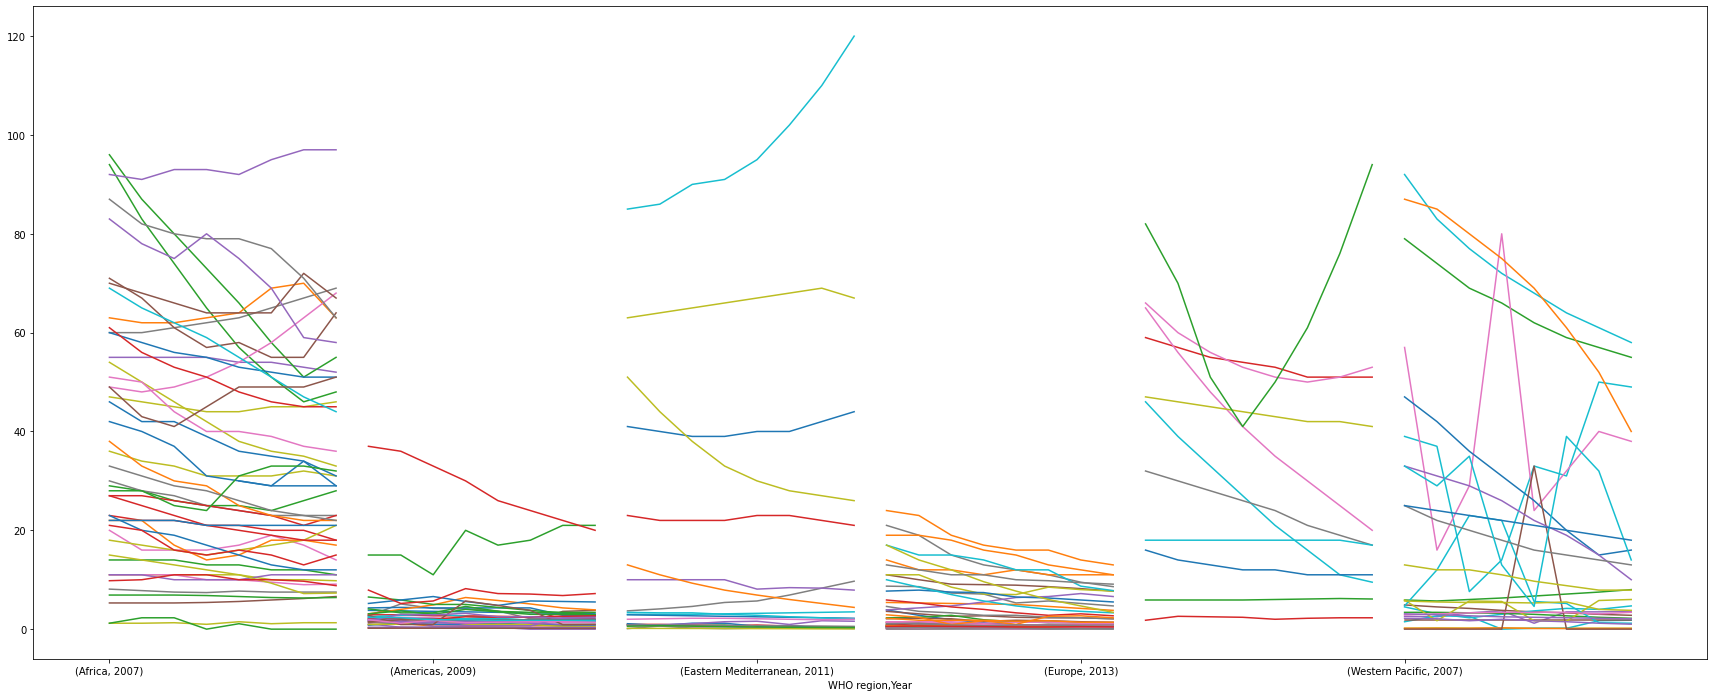

In [87]:
tb_drate_pivot.plot(figsize=(30,12), legend=False)

In [88]:
tb_drate[(tb_drate['WHO region']=='Africa') & (tb_drate['Year']==2007)].sort_values('Numeric').tail(10)

,Indicator,Year,WHO region,World Bank income group,Country,Numeric
3188,Deaths due to tuberculosis among HIV-negative ...,2007,Africa,Low-income,Sierra Leone,61.0
5165,Deaths due to tuberculosis among HIV-negative ...,2007,Africa,Low-income,Guinea-Bissau,63.0
4003,Deaths due to tuberculosis among HIV-negative ...,2007,Africa,Upper-middle-income,South Africa,69.0
3624,Deaths due to tuberculosis among HIV-negative ...,2007,Africa,Low-income,Mozambique,70.0
2306,Deaths due to tuberculosis among HIV-negative ...,2007,Africa,Lower-middle-income,Lesotho,71.0
615,Deaths due to tuberculosis among HIV-negative ...,2007,Africa,Low-income,United Republic of Tanzania,83.0
3274,Deaths due to tuberculosis among HIV-negative ...,2007,Africa,Upper-middle-income,Namibia,87.0
1305,Deaths due to tuberculosis among HIV-negative ...,2007,Africa,Lower-middle-income,Nigeria,92.0
2467,Deaths due to tuberculosis among HIV-negative ...,2007,Africa,Low-income,Central African Republic,94.0
5784,Deaths due to tuberculosis among HIV-negative ...,2007,Africa,Upper-middle-income,Gabon,96.0


In [89]:
tb_drate[(tb_drate['WHO region']=='Americas') & (tb_drate['Year']==2007)].sort_values('Numeric').tail(10)

,Indicator,Year,WHO region,World Bank income group,Country,Numeric
2013,Deaths due to tuberculosis among HIV-negative ...,2007,Americas,Upper-middle-income,Dominican Republic,3.1
723,Deaths due to tuberculosis among HIV-negative ...,2007,Americas,Upper-middle-income,Paraguay,3.1
20,Deaths due to tuberculosis among HIV-negative ...,2007,Americas,Lower-middle-income,Bolivia (Plurinational State of),3.8
3432,Deaths due to tuberculosis among HIV-negative ...,2007,Americas,Lower-middle-income,Nicaragua,4.1
1184,Deaths due to tuberculosis among HIV-negative ...,2007,Americas,Upper-middle-income,Dominica,4.3
2082,Deaths due to tuberculosis among HIV-negative ...,2007,Americas,Upper-middle-income,Panama,5.2
5451,Deaths due to tuberculosis among HIV-negative ...,2007,Americas,Upper-middle-income,Ecuador,6.5
4016,Deaths due to tuberculosis among HIV-negative ...,2007,Americas,Upper-middle-income,Peru,7.9
1944,Deaths due to tuberculosis among HIV-negative ...,2007,Americas,Lower-middle-income,Guyana,15.0
2947,Deaths due to tuberculosis among HIV-negative ...,2007,Americas,Low-income,Haiti,37.0


In [90]:
tb_drate[(tb_drate['WHO region']=='Eastern Mediterranean') & (tb_drate['Year']==2007)].sort_values('Numeric').tail(10)

,Indicator,Year,WHO region,World Bank income group,Country,Numeric
2223,Deaths due to tuberculosis among HIV-negative ...,2007,Eastern Mediterranean,Upper-middle-income,Iran (Islamic Republic of),3.0
4854,Deaths due to tuberculosis among HIV-negative ...,2007,Eastern Mediterranean,High-income,Saudi Arabia,3.4
4494,Deaths due to tuberculosis among HIV-negative ...,2007,Eastern Mediterranean,Upper-middle-income,Libya,3.7
4544,Deaths due to tuberculosis among HIV-negative ...,2007,Eastern Mediterranean,Lower-middle-income,Morocco,10.0
722,Deaths due to tuberculosis among HIV-negative ...,2007,Eastern Mediterranean,Lower-middle-income,Yemen,13.0
2344,Deaths due to tuberculosis among HIV-negative ...,2007,Eastern Mediterranean,Lower-middle-income,Sudan,23.0
560,Deaths due to tuberculosis among HIV-negative ...,2007,Eastern Mediterranean,Low-income,Afghanistan,41.0
2265,Deaths due to tuberculosis among HIV-negative ...,2007,Eastern Mediterranean,Lower-middle-income,Pakistan,51.0
2421,Deaths due to tuberculosis among HIV-negative ...,2007,Eastern Mediterranean,Low-income,Somalia,63.0
1774,Deaths due to tuberculosis among HIV-negative ...,2007,Eastern Mediterranean,Lower-middle-income,Djibouti,85.0


In [91]:
tb_drate[(tb_drate['WHO region']=='Europe') & (tb_drate['Year']==2007)].sort_values('Numeric').tail(10)

,Indicator,Year,WHO region,World Bank income group,Country,Numeric
1784,Deaths due to tuberculosis among HIV-negative ...,2007,Europe,Lower-middle-income,Tajikistan,10.0
4365,Deaths due to tuberculosis among HIV-negative ...,2007,Europe,High-income,Lithuania,11.0
2642,Deaths due to tuberculosis among HIV-negative ...,2007,Europe,Upper-middle-income,Belarus,11.0
2427,Deaths due to tuberculosis among HIV-negative ...,2007,Europe,Lower-middle-income,Uzbekistan,13.0
3644,Deaths due to tuberculosis among HIV-negative ...,2007,Europe,Lower-middle-income,Kyrgyzstan,14.0
3913,Deaths due to tuberculosis among HIV-negative ...,2007,Europe,Lower-middle-income,Republic of Moldova,17.0
1201,Deaths due to tuberculosis among HIV-negative ...,2007,Europe,Upper-middle-income,Turkmenistan,17.0
3060,Deaths due to tuberculosis among HIV-negative ...,2007,Europe,High-income,Russian Federation,19.0
1628,Deaths due to tuberculosis among HIV-negative ...,2007,Europe,Upper-middle-income,Kazakhstan,21.0
4555,Deaths due to tuberculosis among HIV-negative ...,2007,Europe,Lower-middle-income,Ukraine,24.0


In [92]:
tb_drate[(tb_drate['WHO region']=='South-East Asia') & (tb_drate['Year']==2007)].sort_values('Numeric').tail(10)

,Indicator,Year,WHO region,World Bank income group,Country,Numeric
3590,Deaths due to tuberculosis among HIV-negative ...,2007,South-East Asia,Lower-middle-income,Sri Lanka,5.9
2885,Deaths due to tuberculosis among HIV-negative ...,2007,South-East Asia,Upper-middle-income,Thailand,16.0
4551,Deaths due to tuberculosis among HIV-negative ...,2007,South-East Asia,Low-income,Nepal,18.0
58,Deaths due to tuberculosis among HIV-negative ...,2007,South-East Asia,Lower-middle-income,India,32.0
2940,Deaths due to tuberculosis among HIV-negative ...,2007,South-East Asia,Lower-middle-income,Bhutan,46.0
5554,Deaths due to tuberculosis among HIV-negative ...,2007,South-East Asia,Lower-middle-income,Indonesia,47.0
2418,Deaths due to tuberculosis among HIV-negative ...,2007,South-East Asia,Lower-middle-income,Bangladesh,59.0
4770,Deaths due to tuberculosis among HIV-negative ...,2007,South-East Asia,Low-income,Democratic People's Republic of Korea,65.0
5049,Deaths due to tuberculosis among HIV-negative ...,2007,South-East Asia,Lower-middle-income,Myanmar,66.0
2383,Deaths due to tuberculosis among HIV-negative ...,2007,South-East Asia,Lower-middle-income,Timor-Leste,82.0


In [93]:
tb_drate[(tb_drate['WHO region']=='Western Pacific') & (tb_drate['Year']==2007)].sort_values('Numeric').tail(10)

,Indicator,Year,WHO region,World Bank income group,Country,Numeric
3606,Deaths due to tuberculosis among HIV-negative ...,2007,Western Pacific,Lower-middle-income,Solomon Islands,25.0
1291,Deaths due to tuberculosis among HIV-negative ...,2007,Western Pacific,Lower-middle-income,Viet Nam,25.0
5116,Deaths due to tuberculosis among HIV-negative ...,2007,Western Pacific,Lower-middle-income,Philippines,33.0
3086,Deaths due to tuberculosis among HIV-negative ...,2007,Western Pacific,Upper-middle-income,Tuvalu,33.0
4158,Deaths due to tuberculosis among HIV-negative ...,2007,Western Pacific,Lower-middle-income,Kiribati,39.0
3847,Deaths due to tuberculosis among HIV-negative ...,2007,Western Pacific,Lower-middle-income,Micronesia (Federated States of),47.0
431,Deaths due to tuberculosis among HIV-negative ...,2007,Western Pacific,Upper-middle-income,Marshall Islands,57.0
4160,Deaths due to tuberculosis among HIV-negative ...,2007,Western Pacific,Lower-middle-income,Lao People's Democratic Republic,79.0
796,Deaths due to tuberculosis among HIV-negative ...,2007,Western Pacific,Lower-middle-income,Papua New Guinea,87.0
3315,Deaths due to tuberculosis among HIV-negative ...,2007,Western Pacific,Low-income,Cambodia,92.0


<h4> Scatter plot by World Bank income group<h4>

In [94]:
gdp=pd.read_csv('../final_proposal_data/GDP_pcap_2014.csv')

In [95]:
test=tb_prev_2014.merge(gdp, on='Country', how='inner')
test.shape

(165, 7)

In [96]:
le=pd.read_csv('../final_proposal_data/LE2014.csv')

In [97]:
test_le=test.merge(le, on='Country', how='inner')

In [98]:
test_le['log_gdp_pcap']=np.log10(test_le.GDP_pcap)

In [99]:
test_le['WHO region']=test_le['WHO region'].astype('category')
test_le['World Bank income group'] = test_le['World Bank income group'].asbtype('category')

In [102]:
test_le.dtypes

Indicator                    object
Year                          int64
WHO region                 category
World Bank income group    category
Country                      object
Numeric                     float64
GDP_pcap                    float64
Life_expectancy             float64
log_gdp_pcap                float64
dtype: object

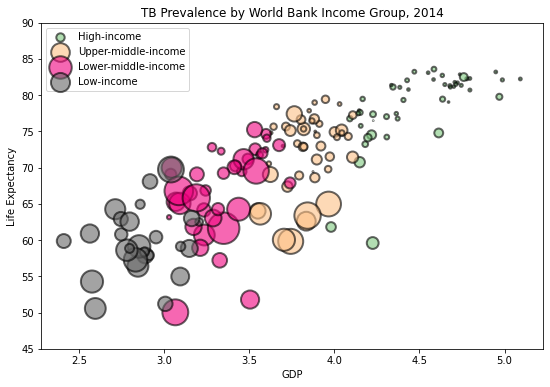

In [110]:
plt.figure(figsize=(9, 6))

categories = test_le['World Bank income group'].unique()

color_map = plt.cm.get_cmap('Accent', len(categories))

for i, category in enumerate(categories):
    category_data = test_le[test_le['World Bank income group'] == category]
    plt.scatter(
        x=category_data['log_gdp_pcap'],
        y=category_data['Life_expectancy'],
        s=category_data['Numeric'],
        color=color_map(i),
        alpha=0.6,
        edgecolors="black",
        linewidth=2,
        label=category
    )

plt.xlabel("GDP")
plt.ylabel("Life Expectancy")
plt.title("TB Prevalence by World Bank Income Group, 2014")
plt.ylim(45, 90)
plt.legend()

plt.show()


<h4> GIF scatterplot by World Bank income group. <h4>

In [153]:
gdp=pd.read_csv('../final_proposal_data/GDP_pcap_2007_2014.csv')

In [154]:
gdp.columns=[('year_' if len(i)==4 else '') + i for i in gdp.columns]
gdp.columns

Index(['Country', 'year_2007', 'year_2008', 'year_2009', 'year_2010',
       'year_2011', 'year_2012', 'year_2013', 'year_2014'],
      dtype='object')

In [155]:
gdp.head()

,Country,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014
0,Aruba,27665.426470,29011.559250,25739.137250,24452.928360,26044.435930,25609.955720,26515.678080,26942.307980
1,Africa Eastern and Southern,1369.855328,1428.382728,1411.622460,1643.605569,1792.907505,1759.182395,1730.394686,1719.183721
2,Afghanistan,375.078128,387.849174,443.845150,554.595200,621.912311,663.141053,651.987862,628.146804
3,Africa Western and Central,1417.605050,1681.477680,1463.393293,1675.739572,1856.687669,1953.407033,2149.295219,2243.271464
4,Angola,3121.350475,4081.715004,3123.697586,3496.784796,4511.153227,4962.552072,5101.983876,5059.080441


In [156]:
gdp=pd.wide_to_long(gdp, stubnames='year_', j='Year', i=['Country']).reset_index().rename(columns={'year_':'GDP_pcap'})

In [157]:
gdp.head()

,Country,Year,GDP_pcap
0,Aruba,2007,27665.426470
1,Africa Eastern and Southern,2007,1369.855328
2,Afghanistan,2007,375.078128
3,Africa Western and Central,2007,1417.605050
4,Angola,2007,3121.350475


In [158]:
tb_prev_gdp=tb_prev.merge(gdp, on=['Country', 'Year'], how='left')

In [159]:
tb_prev_gdp.head()

,Indicator,Year,WHO region,World Bank income group,Country,Numeric,GDP_pcap
0,Prevalence of tuberculosis (per 100 000 popula...,2007,Western Pacific,Lower-middle-income,Philippines,576.00,1741.603172
1,Prevalence of tuberculosis (per 100 000 popula...,2013,South-East Asia,Lower-middle-income,Timor-Leste,757.00,1201.423581
2,Prevalence of tuberculosis (per 100 000 popula...,2008,Africa,Upper-middle-income,Algeria,137.00,4946.564017
3,Prevalence of tuberculosis (per 100 000 popula...,2011,Eastern Mediterranean,High-income,Kuwait,36.00,49006.581450
4,Prevalence of tuberculosis (per 100 000 popula...,2014,Americas,High-income,Barbados,0.42,16924.190340


In [160]:
le=pd.read_csv('../final_proposal_data/LE2007_2014.csv')

In [161]:
le.head()

,Country,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,74.210000,74.147000,74.560000,75.404000,75.465000,75.531000,75.636000,75.601000
1,Africa Eastern and Southern,55.933802,56.680419,57.620852,58.411150,59.293271,60.050780,60.709863,61.337911
2,Afghanistan,59.111000,59.852000,60.364000,60.851000,61.419000,61.923000,62.417000,62.545000
3,Africa Western and Central,53.251712,53.641165,54.159421,54.550169,55.013138,55.340561,55.673406,55.922229
4,Angola,53.642000,54.633000,55.752000,56.726000,57.596000,58.623000,59.307000,60.040000


In [162]:
le.columns=[('year_' if len(i)==4 else '') + i for i in le.columns]
le.columns

Index(['Country', 'year_2007', 'year_2008', 'year_2009', 'year_2010',
       'year_2011', 'year_2012', 'year_2013', 'year_2014'],
      dtype='object')

In [163]:
le=pd.wide_to_long(le, stubnames='year_', j='Year', i=['Country']).reset_index().rename(columns={'year_':'Life_exp'})

In [164]:
le.head()

,Country,Year,Life_exp
0,Aruba,2007,74.210000
1,Africa Eastern and Southern,2007,55.933802
2,Afghanistan,2007,59.111000
3,Africa Western and Central,2007,53.251712
4,Angola,2007,53.642000


In [165]:
tb_prev_gdp_le=tb_prev_gdp.merge(le, on=['Country', 'Year'], how='left')

In [166]:
tb_prev_gdp_le.dropna(inplace=True)

In [167]:
tb_prev_gdp_le.head()

,Indicator,Year,WHO region,World Bank income group,Country,Numeric,GDP_pcap,Life_exp
0,Prevalence of tuberculosis (per 100 000 popula...,2007,Western Pacific,Lower-middle-income,Philippines,576.00,1741.603172,70.483
1,Prevalence of tuberculosis (per 100 000 popula...,2013,South-East Asia,Lower-middle-income,Timor-Leste,757.00,1201.423581,66.440
2,Prevalence of tuberculosis (per 100 000 popula...,2008,Africa,Upper-middle-income,Algeria,137.00,4946.564017,72.941
3,Prevalence of tuberculosis (per 100 000 popula...,2011,Eastern Mediterranean,High-income,Kuwait,36.00,49006.581450,78.464
4,Prevalence of tuberculosis (per 100 000 popula...,2014,Americas,High-income,Barbados,0.42,16924.190340,76.476


In [168]:
tb_prev_gdp_le['log_gdp_pcap']=np.log10(tb_prev_gdp_le.GDP_pcap)

In [169]:
tb_prev_gdp_le.sort_values(by='GDP_pcap').tail()

,Indicator,Year,WHO region,World Bank income group,Country,Numeric,GDP_pcap,Life_exp,log_gdp_pcap
6,Prevalence of tuberculosis (per 100 000 popula...,2012,Europe,High-income,Luxembourg,8.4,112584.6763,81.392683,5.051479
861,Prevalence of tuberculosis (per 100 000 popula...,2011,Europe,High-income,Luxembourg,8.6,119025.0572,80.987805,5.075638
303,Prevalence of tuberculosis (per 100 000 popula...,2013,Europe,High-income,Luxembourg,8.2,120000.1407,81.800000,5.079182
1146,Prevalence of tuberculosis (per 100 000 popula...,2008,Europe,High-income,Luxembourg,9.6,120422.1379,80.539024,5.080706
947,Prevalence of tuberculosis (per 100 000 popula...,2014,Europe,High-income,Luxembourg,8.0,123678.7021,82.229268,5.092295


In [172]:
tb_prev_gdp_le['WHO region']=tb_prev_gdp_le['WHO region'].astype('category')
tb_prev_gdp_le['World Bank income group'] = tb_prev_gdp_le['World Bank income group'].astype('category')

In [173]:
dpi=96

for i in tb_prev_gdp_le.Year.unique():
    plt.ioff()
    fig = plt.figure(figsize=(680/dpi, 480/dpi), dpi=dpi)
    subsetData = tb_prev_gdp_le[ tb_prev_gdp_le.Year == i ]

    plt.scatter(
        x=subsetData['log_gdp_pcap'], 
        y=subsetData['Life_exp'], 
        s=subsetData['Numeric'], 
        c=subsetData['World Bank income group'].cat.codes, 
        cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    
    plt.xlabel("GDP per Capita")
    plt.ylabel("Life Expectancy")
    plt.title("Year: "+str(i) )
    plt.ylim(40,100)
    plt.xlim(2, 5)
    
    filename='C:/Users/ikhor/OneDrive/Documents/GA/final_proposal_data/GIF/'+str(i)+'.png'
    plt.savefig(fname=filename, dpi=100, facecolor='white')
    plt.gca()
    plt.close(fig)